In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.figure_factory as ff
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.pipeline import Pipeline


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix


from sklearn.metrics import (accuracy_score, log_loss, classification_report)


import warnings

In [147]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [148]:
cols_to_drop = (['EmployeeCount', 'MaritalStatus', 'Over18', 'StandardHours', 'PerformanceRating', 'EmployeeNumber', 'DailyRate', 'HourlyRate', 'MonthlyRate'])

In [149]:
df = df.drop(columns=cols_to_drop)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MonthlyIncome             1470 non-null   int64 
 14  NumCompaniesWorked      

In [151]:
df = df[df.TotalWorkingYears != 0]

In [152]:
df['AvgTenure'] = df['TotalWorkingYears'] / df['NumCompaniesWorked']


In [153]:
X = df.drop(columns = ['Attrition', 'AvgTenure'], axis=1)

y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42, stratify=y)

In [163]:
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()

num_pipeline = Pipeline([('numnorm', scaler)])

obj_pipeline = Pipeline([('one-hot-encoder', OneHotEncoder(sparse=False)), ('scaling', scaler)])

ct = ColumnTransformer([('test', num_pipeline, X_train.select_dtypes(['float', 'int64']).columns),
                        ('one_hotscale', obj_pipeline, X_train.select_dtypes(['object']).columns)])

In [164]:
# from sklearn.compose import ColumnTransformer

# num_pipeline = Pipeline([('numnorm', StandardScaler())])

# obj_pipeline = Pipeline([('one-hot-encoder', OneHotEncoder(sparse=False)), ('scaling', StandardScaler())])

# ct = ColumnTransformer([('test', num_pipeline, X_train.select_dtypes(['float', 'int64']).columns),
#                         ('one_hotscale', obj_pipeline, X_train.select_dtypes(['object']).columns)])

In [165]:
pipe = Pipeline([('ct', ct), ('logreg', LogisticRegression())])

In [166]:
pipe.fit(X_train, y_train);

In [167]:
y_pred = pipe.predict(X_test)

In [168]:
cross_val_score(pipe, X_train, y_train)

array([0.90306122, 0.89795918, 0.86666667, 0.86153846, 0.88717949])

In [169]:
cross_val_score(pipe, X_test, y_test)

array([0.86597938, 0.87628866, 0.73958333, 0.88541667, 0.91666667])

In [170]:
print("Model:")
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("__"*40)
print(" ")
print(classification_report(y_test, y_pred))

Model:
Accuracy score: 0.8858921161825726
________________________________________________________________________________
 
              precision    recall  f1-score   support

          No       0.90      0.98      0.93       405
         Yes       0.76      0.42      0.54        77

    accuracy                           0.89       482
   macro avg       0.83      0.70      0.74       482
weighted avg       0.88      0.89      0.87       482



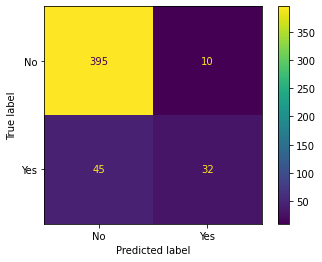

In [162]:
plot_confusion_matrix(pipe, X_test, y_test);

# Decision Tree




In [196]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

num_pipeline = Pipeline([('numnorm', StandardScaler())])

obj_pipeline = Pipeline([('ordinal-encoder', OrdinalEncoder()), ('scaling', StandardScaler())])

# ct = ColumnTransformer([('scale-numeric', num_pipeline, X_train.select_dtypes(['float', 'int64']).columns)])
ct = ColumnTransformer([('scale-numeric', num_pipeline, X_train.select_dtypes(['float', 'int64']).columns),
                        ('ordinal-encoder-scale', obj_pipeline, X_train.select_dtypes(['object']).columns)]) 

In [219]:
clf = tree.DecisionTreeClassifier(max_depth=4)

pipe = Pipeline([('ct', ct), ('decision-tree-reg', clf)])


In [220]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('scale-numeric',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorking...
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                                 ('ordinal-encoder-scale',
                                                  Pipeline(steps=[('ordinal-encoder',
                                                                   OrdinalEncoder()),
                             

In [221]:
y_pred = pipe.predict(X_test)

In [222]:
cross_val_score(pipe, X_train, y_train)

array([0.81632653, 0.84183673, 0.84615385, 0.82051282, 0.85641026])

In [223]:
cross_val_score(pipe, X_test, y_test)

array([0.84536082, 0.81443299, 0.79166667, 0.84375   , 0.86458333])

In [224]:
print("Model:")
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("__"*40)
print(" ")
print(classification_report(y_test, y_pred))

Model:
Accuracy score: 0.8319502074688797
________________________________________________________________________________
 
              precision    recall  f1-score   support

          No       0.88      0.93      0.90       405
         Yes       0.46      0.31      0.37        77

    accuracy                           0.83       482
   macro avg       0.67      0.62      0.64       482
weighted avg       0.81      0.83      0.82       482



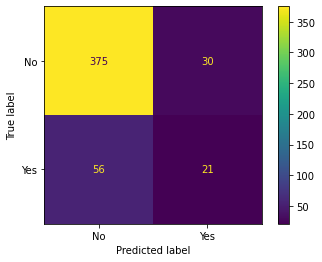

In [218]:
plot_confusion_matrix(pipe, X_test, y_test);

In [228]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3,5,7,9,10],
    'min_samples_split': [2, 4, 10, 20]
}

In [229]:
gs_tree = GridSearchCV(pipe, param_grid, cv=3)

gs_tree.fit(X_train, y_train)

gs_tree.best_params_

ValueError: Invalid parameter criterion for estimator Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('scale-numeric',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorking...
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                                 ('ordinal-encoder-scale',
                                                  Pipeline(steps=[('ordinal-encoder',
                                                                   OrdinalEncoder()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'OverTime'],
      dtype='object'))])),
                ('decision-tree-reg', DecisionTreeClassifier(max_depth=4))]). Check the list of available parameters with `estimator.get_params().keys()`.